In [2]:
from sympy import init_printing
init_printing(use_unicode=True)

In [7]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sisl as s
%matplotlib inline

This document tries to clarify a fast method by which we can find the points on a rotated ellipsoid.

The ellipsoid can be written as (with the $x$, $y$ and $z$ offset by $x_0$, $y_0$ and $z_0$:
\begin{equation}
  \frac{x^2}{a^2} + \frac{y^2}{b^2} +\frac{z^2}{c^2} = 1
\end{equation}
which can be written in a rotated basis as:
\begin{equation}
  \frac{x^2}{a^2} + \frac{y^2}{b^2} +\frac{z^2}{c^2} = 1
\end{equation}

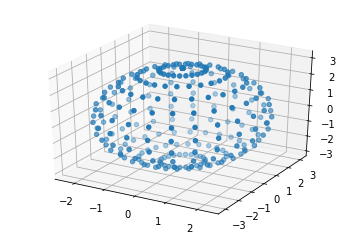

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
e = s.Ellipsoid([[1., 3, 0],
                [3, 2, 0],
                [3, 0, 3]])
# Figure out the max-min indices with a spacing of 1 radians
pi = np.pi
rad = pi / 12
theta, phi = np.ogrid[-pi:pi:rad, 0:pi:rad]

rxyz = np.empty([theta.size, phi.size, 3], np.float64)
rxyz[..., 2] = np.cos(phi)
np.sin(phi, out=phi)
rxyz[..., 0] = np.cos(theta) * phi
rxyz[..., 1] = np.sin(theta) * phi
axyz = np.dot(rxyz, e._v)
ax.scatter(*axyz.T)

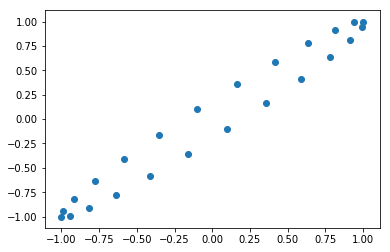

In [36]:
c = np.array([[1, 1],
             [-0.1, 0.1]])
theta = np.ogrid[-pi:pi:rad]
rxy = np.empty([theta.size, 2], np.float64)
rxy[:, 0] = np.cos(theta)
rxy[:, 1] = np.sin(theta)
axy = np.dot(rxy, c)
plt.scatter(*axy.T)